In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler as sc 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
input_df = pd.read_csv("./dataset/housing.csv")

In [ ]:
input_df.hist(figsize=(10, 10))

Command took 2.53 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:51 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

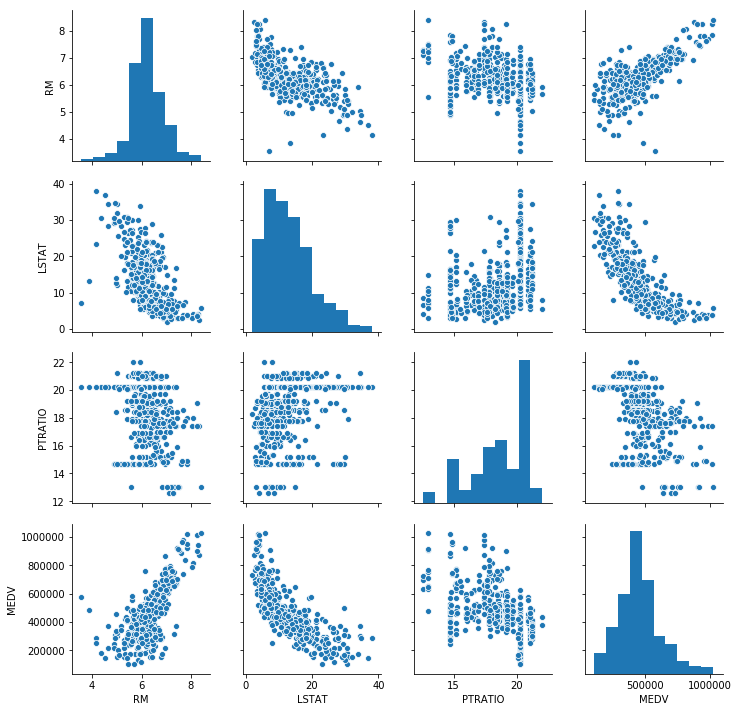

In [31]:
sns.pairplot(input_df)

Command took 0.27 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:52 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

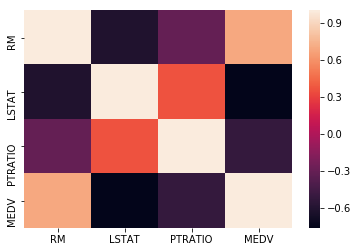

In [32]:
sns.heatmap(input_df.corr())

It seems like there is a positive correlation between median value of a house and the RM. We can also see a positive correlation between PTRATIO and LSTAT. LSTAT has a string negative correlation to MEDV.

In [33]:
input_df.isnull().sum()

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:52 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

There are no null values

In [34]:
(input_df<=0.0).sum()

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:53 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

There is no 0 present for values in the dataset.

In [35]:
scalar = sc()
features  = ["RM", "LSTAT"]
outcomes = ["MEDV"]

Command took 0.00 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:53 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [36]:
X = input_df[features]
y = input_df[outcomes]

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:54 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [37]:
X_scaled = scalar.fit_transform(X)

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:55 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [38]:
X = pd.DataFrame(data = X_scaled, columns=np.array(features))

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:07:55 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [43]:
kfold = 10
kf = KFold(n_splits=10, random_state= 10)

model_names = ["Linear Regression","Ridge Regression", "Elastic Net"]
models = [linear_model.LinearRegression(), linear_model.Ridge(alpha=.5, random_state=10), linear_model.ElasticNet(random_state=10)]

mean_r2 = []
global_r2 = []

def evaluate_models(X=X, y=y):
   '''
       This method performs 10 fold cross validation on list of models and returns a dataframe with mean f1 and mean accuracy scores for each model
   '''
   for name, model in zip(model_names, models):
        r2 = []
        
        for train_index, test_index in kf.split(X, y):
            
            X_train = X.loc[train_index] 
            y_train = y.loc[train_index]
            X_test = X.loc[test_index]
            y_test = y.loc[test_index]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2.append(r2_score(y_test, y_pred))
            
        global_r2.append(r2)
        mean_r2.append(np.mean(np.array(r2)))
        
   model_perf_df = pd.DataFrame(np.array([ mean_r2]).T,index=model_names)   
   model_perf_df.columns = ['Mean R2']
   return model_perf_df

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:11:23 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [44]:
def generate_box_plot():
    box=pd.DataFrame( data=global_r2,index=[model_names])
    plt.figure(figsize=(20, 20))
    sns.boxplot(data=box.T).set_title('Mean r2 score')

Command took 0.00 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:11:35 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [45]:
## define utility methods
def convert_to_dataframe(ndar, cols):
    '''Given a set of records in nupy array and a list of column names return a Pandas dataframe'''
    pdf = pd.DataFrame.from_records(ndar)
    pdf.columns = cols
    return pdf

Command took 0.00 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:11:35 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

In [46]:
evaluate_models().sort_values(ascending=False, by = 'Mean R2')

Command took 0.16 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:11:37 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

,Mean R2
Ridge Regression,0.255704
Linear Regression,0.255433
Elastic Net,0.239411


In [50]:
global_r2

Command took 0.01 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:21:22 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

[[0.7771832606859472,
  0.6731245835185766,
  0.57218124072297,
  0.5588569833575308,
  0.5319267005029402,
  0.5530226086877054,
  0.3546686691074611,
  -0.4859114935697335,
  -1.4779934364653813,
  0.4972723984404731],
 [0.7771930023372918,
  0.6734277201132284,
  0.572578022265942,
  0.5589138654458483,
  0.5318293521844946,
  0.5526176626179021,
  0.3554421175009701,
  -0.483911652883124,
  -1.4786177789430255,
  0.4975637560116528],
 [0.7410329266980296,
  0.6945880308185425,
  0.6336516801572971,
  0.5079063550604321,
  0.43620623020766314,
  0.3215083401706028,
  0.5004375802824895,
  -0.1299905133627739,
  -1.8504878247466312,
  0.5392534930667752]]

Command took 0.66 seconds -- by debu.sinha@databricks.com at 02/12/2020, 04:12:20 AM UTC on Jupyter

Accordion(children=(VBox(),), layout=Layout(display='none'), selected_index=None)

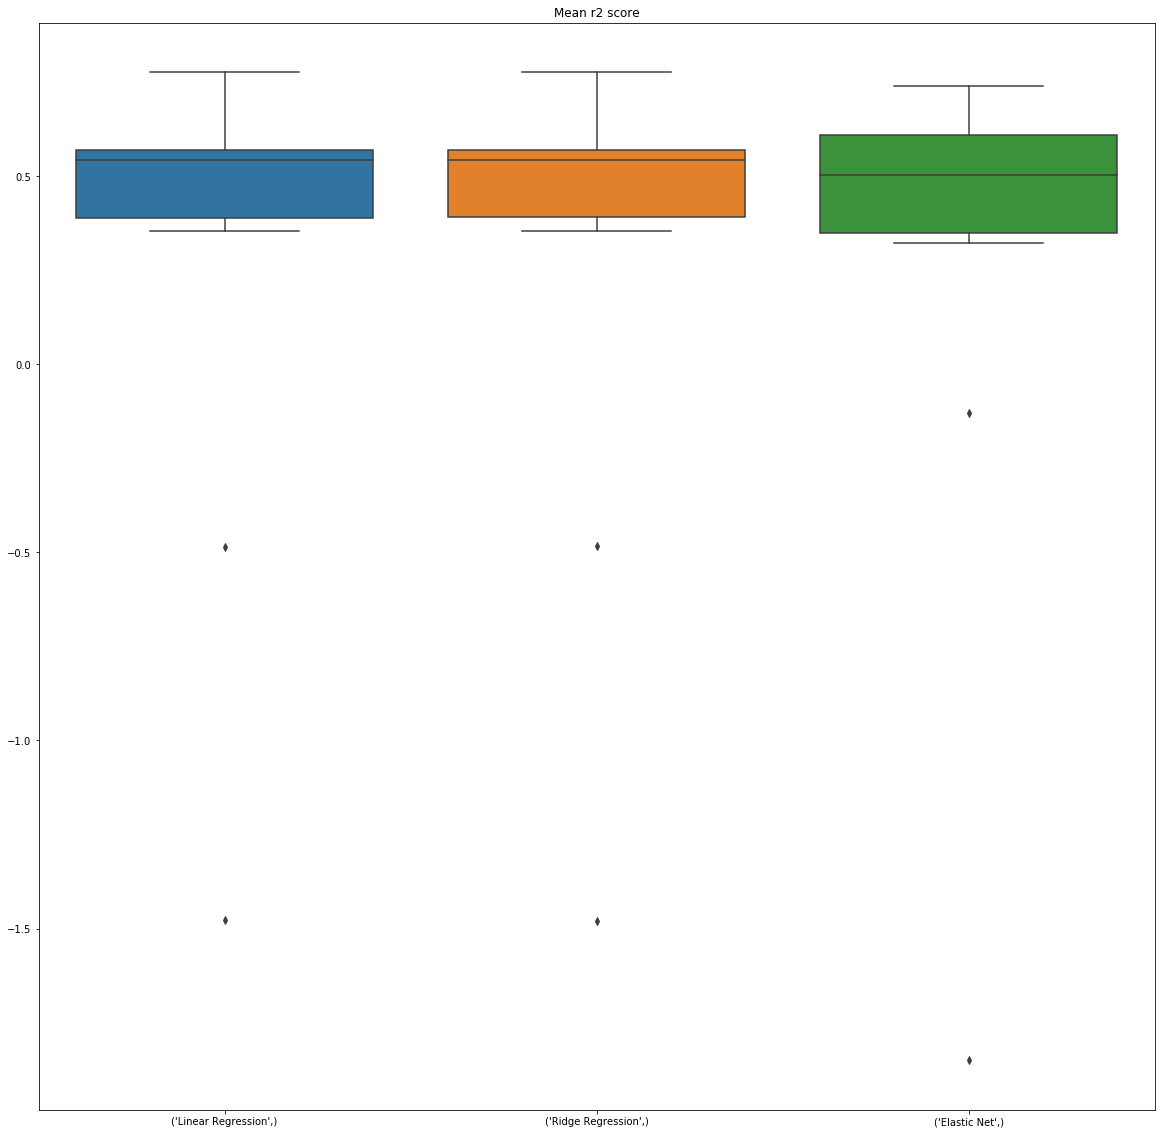

In [49]:
generate_box_plot()